In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
import seaborn as sns

from imblearn.over_sampling import SMOTE

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix,f1_score, classification_report
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from keras.callbacks import EarlyStopping
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from google.colab import drive
import warnings
drive.mount('/content/drive')
warnings.filterwarnings(action='ignore') 

Mounted at /content/drive


In [ ]:
train_df = pd.read_csv('./drive/MyDrive/Project/Fraud_Detection(Dacon)/CSV/train.csv') # Train
train_df.head()

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30
0,3,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,-0.994972
1,4,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,-0.994972
2,6,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,-0.256131,-0.994960
3,8,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,0.262698,-0.994901
4,9,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,0.994900,-0.994901


In [ ]:
val_df = pd.read_csv('./drive/MyDrive/Project/Fraud_Detection(Dacon)/CSV/val.csv') # Validation
val_df.head()

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,V29,V30,Class
0,10,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,-0.255991,-0.994878,0
1,22,0.962496,0.328461,-0.171479,2.109204,1.129566,1.696038,0.107712,0.521502,-1.191311,...,0.402492,-0.048508,-1.371866,0.390814,0.199964,0.016371,-0.014605,0.168937,-0.994784,0
2,63,1.145524,0.575068,0.194008,2.598192,-0.092210,-1.044430,0.531588,-0.241888,-0.896287,...,-0.119703,-0.076510,0.691320,0.633984,0.048741,-0.053192,0.016251,0.169496,-0.994502,0
3,69,0.927060,-0.323684,0.387585,0.544474,0.246787,1.650358,-0.427576,0.615371,0.226278,...,0.079359,0.096632,-0.992569,0.085096,0.377447,0.036096,-0.005960,0.331307,-0.994467,0
4,83,-3.005237,2.600138,1.483691,-2.418473,0.306326,-0.824575,2.065426,-1.829347,4.009259,...,-0.181268,-0.163747,0.515821,0.136318,0.460054,-0.251259,-1.105751,-0.287012,-0.994373,0


In [ ]:
test_df = pd.read_csv('./drive/MyDrive/Project/Fraud_Detection(Dacon)/CSV/test.csv') # Train
test_df.head()

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30
0,AAAA0x1,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.783274,-0.994983
1,AAAA0x2,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.269825,-0.994983
2,AAAA0x5,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.670579,-0.994960
3,AAAA0x7,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,-0.237686,-0.994937
4,AAAA0xc,0.384978,0.616109,-0.874300,-0.094019,2.924584,3.317027,0.470455,0.538247,-0.558895,...,0.049924,0.238422,0.009130,0.996710,-0.767315,-0.492208,0.042472,-0.054337,-0.167819,-0.994866


In [ ]:
print(train_df.shape)

(113842, 31)


In [ ]:
print(val_df.shape)

(28462, 32)


In [ ]:
print(test_df.shape)

(142503, 31)


In [ ]:
train_x = train_df.drop(columns=['ID'])

In [ ]:
val_x = val_df.drop(columns=['ID', 'Class']) # Input Data
val_y = val_df['Class'] # Label

In [ ]:
np.unique(val_y,return_counts=True)

(array([0, 1]), array([28432,    30]))

In [ ]:
test_x = test_df.drop(columns=['ID'])

In [ ]:
print(train_x)
print(val_x)
print(val_y)

               V1         V2        V3        V4        V5        V6  \
0       -1.358354  -1.340163  1.773209  0.379780 -0.503198  1.800499   
1       -0.966272  -0.185226  1.792993 -0.863291 -0.010309  1.247203   
2       -0.425966   0.960523  1.141109 -0.168252  0.420987 -0.029728   
3       -0.644269   1.417964  1.074380 -0.492199  0.948934  0.428118   
4       -0.894286   0.286157 -0.113192 -0.271526  2.669599  3.721818   
...           ...        ...       ...       ...       ...       ...   
113837 -12.516732  10.187818 -8.476671 -2.510473 -4.586669 -1.394465   
113838   1.884849  -0.143540 -0.999943  1.506772 -0.035300 -0.613638   
113839  -0.241923   0.712247  0.399806 -0.463406  0.244531 -1.343668   
113840   0.120316   0.931005 -0.546012 -0.745097  1.130314 -0.235973   
113841 -11.881118  10.071785 -9.834783 -2.066656 -5.364473 -2.606837   

              V7        V8        V9       V10  ...       V21       V22  \
0       0.791461  0.247676 -1.514654  0.207643  ...  0.24799

In [ ]:
scaler = StandardScaler()
train_x_normal = scaler.fit_transform(train_x)
val_x_normal = scaler.transform(val_x)
test_x_normal = scaler.transform(test_x)
train_x_normal= train_x_normal.reshape(-1,30,1)
val_x_normal = val_x_normal.reshape(-1,30,1)
test_x_normal = test_x_normal.reshape(-1,30,1)
print(train_x_normal.shape)
print(test_x_normal.shape)

(113842, 30, 1)
(142503, 30, 1)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (113842, 30, 64)          704       
                                                                 
 dropout (Dropout)           (113842, 30, 64)          0         
                                                                 
 dense_4 (Dense)             (113842, 30, 128)         8320      
                                                                 
 dense_5 (Dense)             (113842, 30, 256)         33024     
                                                                 
 dense_6 (Dense)             (113842, 30, 128)         32896     
                                                                 
 conv1d_3 (Conv1D)           (113842, 30, 64)          81984     
                                                                 
 dense_7 (Dense)             (113842, 30, 1)          

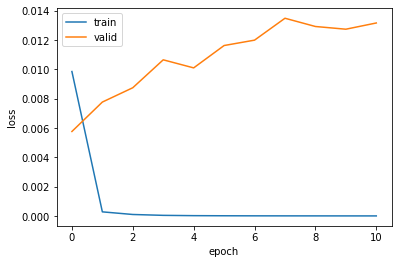

In [ ]:
def modeling_Autoencoder(x):
    model = keras.Sequential()
    model.add(keras.layers.Conv1D(filters=64,kernel_size=10, padding = 'same',activation="linear", kernel_initializer="he_normal"))
    model.add(keras.layers.Dropout(0.3))
    model.add(keras.layers.Dense(128,activation="relu", kernel_initializer="he_normal"))
    model.add(keras.layers.Dense(256,activation="relu", kernel_initializer="he_normal"))
    model.add(keras.layers.Dense(128,activation="relu", kernel_initializer="he_normal"))
    model.add(keras.layers.Conv1D(filters=64,kernel_size=10, padding = 'same',activation="linear", kernel_initializer="he_normal"))
    model.add(keras.layers.Dense(x.shape[2]))
    model.compile(optimizer='adam', loss='mse')
    model.build(x.shape)
    model.summary()
    return model
model_ae = modeling_Autoencoder(train_x_normal)
early_stopping = EarlyStopping(monitor = 'val_loss', patience = 10, mode = 'auto')
history = model_ae.fit(train_x_normal,train_x_normal, epochs=100, batch_size=8, validation_split=0.2, callbacks=[early_stopping]).history
plt.plot(history['loss'], label ="train")
plt.plot(history['val_loss'], label="valid")
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [ ]:
model_ae.save('./drive/MyDrive/Project/Fraud_Detection(Dacon)/model/AE_conv1d.h5')


In [ ]:
model_ae = keras.models.load_model('./drive/MyDrive/Project/Fraud_Detection(Dacon)/model/AE_conv1d.h5')

In [ ]:
pred = model_ae.predict(val_x_normal)
pred = pred.reshape(-1,30)
val_x_normal = val_x_normal.reshape(-1,30)
error = val_x_normal - pred
mse = np.sqrt(np.mean(np.power(error,2),axis=1))

(28462,)


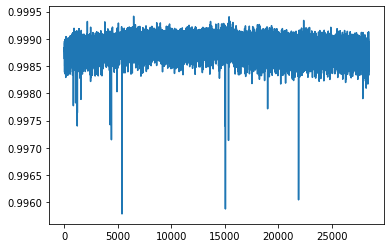

In [ ]:
sim = np.zeros(pred.shape[0])
for i in range(pred.shape[0]):
  sim[i] = cosine_similarity(val_x_normal[i].reshape(1,-1),pred[i].reshape(1,-1))
print(sim.shape)
plt.plot(sim)

In [ ]:
pred_anomaly = np.zeros(val_x_normal.shape[0])
threshold_sim = 0.99991
for i in range(len(mse)):
    if sim[i] < threshold_sim:
        pred_anomaly[i]=1
print(np.unique(pred_anomaly, return_counts=True))
print(confusion_matrix(val_y,pred_anomaly))
print(f1_score(val_y, pred_anomaly, average='macro'))
print(classification_report(val_y, pred_anomaly))

(array([0., 1.]), array([28251,   211]))
[[28233   199]
 [   18    12]]
0.547878376964765
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     28432
           1       0.06      0.40      0.10        30

    accuracy                           0.99     28462
   macro avg       0.53      0.70      0.55     28462
weighted avg       1.00      0.99      1.00     28462



(array([0., 1.]), array([28446,    16]))
[[28427     5]
 [   19    11]]
0.7389194569001234
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.69      0.37      0.48        30

    accuracy                           1.00     28462
   macro avg       0.84      0.68      0.74     28462
weighted avg       1.00      1.00      1.00     28462



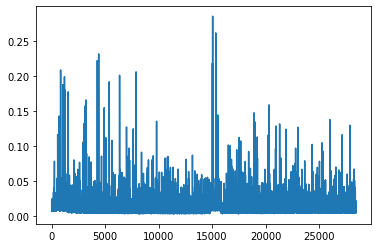

In [ ]:
threshold = 0.17 #0.17
plt.plot(mse)
pred_anomaly = np.zeros(val_x_normal.shape[0])
for i in range(len(mse)):
    if mse[i] > threshold:
        pred_anomaly[i]=1
print(np.unique(pred_anomaly, return_counts=True))
print(confusion_matrix(val_y,pred_anomaly))
print(f1_score(val_y, pred_anomaly, average='macro'))
print(classification_report(val_y, pred_anomaly))

In [ ]:
pred_test = model_ae.predict(test_x_normal)
pred_test = pred_test.reshape(-1,30)
test_x_normal = test_x_normal.reshape(-1,30)
print(test_x_normal.shape)
error =  test_x_normal - pred_test
mse = np.sqrt(np.mean(np.power(error,2),axis=1))
pred = np.zeros(test_x_normal.shape[0])
for i in range(len(mse)):
    if mse[i] > threshold:
        pred[i]=1
print(pred)
print(print(np.unique(pred, return_counts=True)))

(142503, 30)
[0. 0. 0. ... 0. 0. 0.]
(array([0., 1.]), array([142377,    126]))
None


In [ ]:
submit = pd.read_csv('./drive/MyDrive/Project/Fraud_Detection(Dacon)/CSV/sample_submission.csv')
submit['Class'] = pred
submit.to_csv('./drive/MyDrive/Project/Fraud_Detection(Dacon)/CSV/submit.csv', index=False)